In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("placement.csv")

In [6]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


### Steps
1. Preprocess + EDA + Feature Selection
2. Extract input and output cols
3. Scale the values
4. Train test split
5. Train the model
6. Evaluate the model/model selection
7. Deploy the model

In [8]:
df.shape

(100, 4)

In [9]:
df = df.iloc[:,1:]

In [10]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [12]:
import matplotlib.pyplot as plt

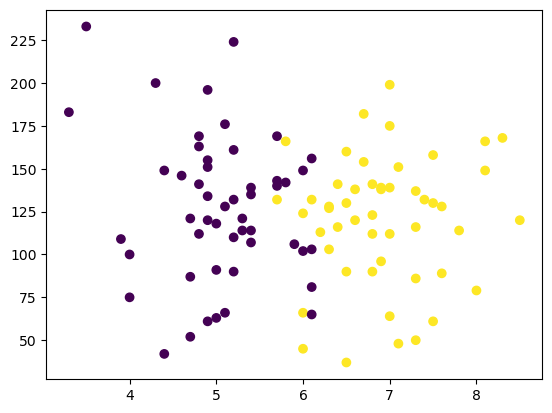

In [14]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [10]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [11]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [12]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler =  StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)

In [25]:
X_train

array([[-0.60307266, -0.09069096],
       [ 1.27737437,  0.13815539],
       [-0.77402239, -1.48919643],
       [ 0.85000005,  1.89264407],
       [ 0.50810059, -0.11611833],
       [-0.68854752, -0.37039206],
       [ 1.36284924, -0.90436687],
       [ 0.59357545,  0.74841232],
       [ 0.93547491,  0.67213021],
       [ 0.76452518,  0.36700174],
       [-0.94497212,  0.23986488],
       [ 1.36284924,  0.08730064],
       [ 2.13212302, -0.11611833],
       [ 0.76452518,  0.34157437],
       [-0.85949725, -0.85351213],
       [ 0.85000005,  0.36700174],
       [-0.68854752,  0.92640393],
       [-0.09022347, -0.47210154],
       [ 0.67905032, -0.8789395 ],
       [ 0.85000005,  1.28238714],
       [-1.11592185, -0.09069096],
       [-0.2611732 ,  0.18901013],
       [ 0.67905032, -0.31953731],
       [-2.31256996,  1.48580612],
       [-0.85949725, -0.16697308],
       [-1.11592185, -1.84517965],
       [ 0.08072626,  0.18901013],
       [ 1.10642464, -0.98064899],
       [ 1.10642464,

In [26]:
X_test = scaler.transform(X_test)

In [27]:
X_test

array([[-0.51759779, -0.26868257],
       [-1.37234644, -2.09945337],
       [ 0.42262572,  0.90097656],
       [ 0.93547491, -1.94688914],
       [-0.2611732 ,  1.12982291],
       [-1.03044698, -0.31953731],
       [ 0.25167599, -0.54838366],
       [ 0.42262572,  0.13815539],
       [ 0.08072626, -0.54838366],
       [-0.17569833,  1.05354079]])

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
clf = LogisticRegression()

In [33]:
#model training
clf.fit(X_train,y_train)

LogisticRegression()

In [37]:
#predicted values
clf.predict(X_test)

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred)

0.8

In [47]:
# To plot decission boundary 
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions


<Axes: >

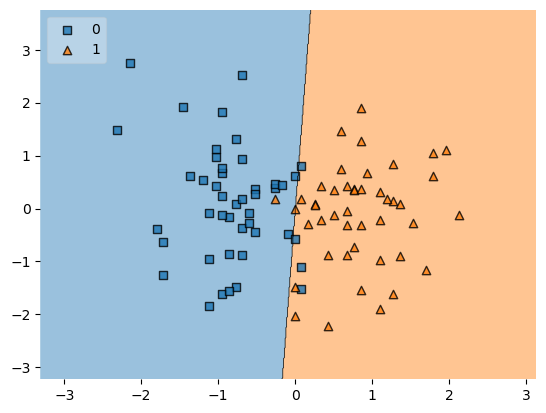

In [48]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)



In [49]:
import pickle

In [50]:
pickle.dump(clf,open("model.pkl",'wb'))